# Primer intento de SOM

## Primero revisaremos si funciona para detectar clusters

In [1]:
from minisom import MiniSom
from sklearn.datasets import load_breast_cancer
import time
import numpy as np
import matplotlib.pyplot as plt
from pylab import plot,axis,show,pcolor,colorbar,bone

In [2]:
som_grid_rows = 30
som_grid_columns = 20
iterations = 500
sigma = 1
learning_rate = .5

In [3]:
data, target = load_breast_cancer(True)

/home/sergio/miniconda3/envs/py3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass return_X_y=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [6]:
data.shape, target.shape

((569, 30), (569,))

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc

MinMaxScaler()

In [8]:
data_sc = sc.fit_transform(data)
data_sc.shape

(569, 30)

In [9]:
som = MiniSom(x=som_grid_rows,
             y=som_grid_columns,
             input_len = data_sc.shape[1],
             sigma=sigma,
             learning_rate=learning_rate)
som.random_weights_init(data)

In [10]:
# entrenamiento

start_time = time.time()

som.train_random(data,iterations)

elapsed_time = time.time() - start_time

print(elapsed_time)

0.0987093448638916


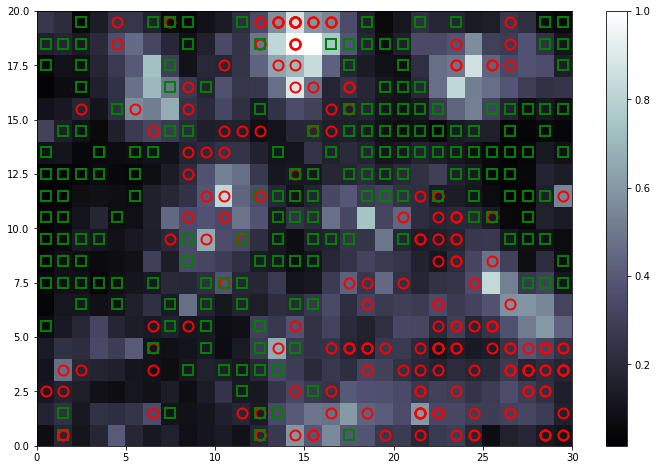

In [11]:
plt.figure(figsize=((12,8)))
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors=['r','g']
for i, x in enumerate(data):
    w = som.winner(x)
    plot(w[0]+.5,
         w[1]+.5,
         markers[target[i]],
        markeredgecolor=colors[target[i]],
        markerfacecolor='None',
        markersize=10,
        markeredgewidth=2)
show()


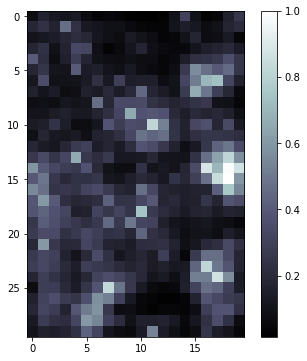

In [12]:
plt.figure(figsize=((6,6)))
plt.imshow(som.distance_map())
plt.colorbar()

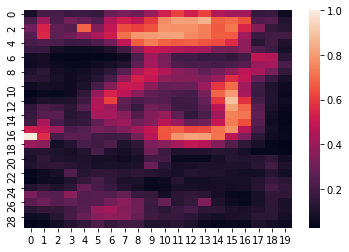

In [47]:
import seaborn as sns
sns.heatmap(som.distance_map())

In [13]:
mappings=som.win_map(data)
len(mappings), type(mappings)

(297, collections.defaultdict)

In [14]:
#mappings

In [15]:
detecciones = np.concatenate([mappings[(1,1)], mappings[(1,8)]])
detecciones

array([[1.305e+01, 1.384e+01, 8.271e+01, 5.306e+02, 8.352e-02, 3.735e-02,
        4.559e-03, 8.829e-03, 1.453e-01, 5.518e-02, 3.975e-01, 8.285e-01,
        2.567e+00, 3.301e+01, 4.148e-03, 4.711e-03, 2.831e-03, 4.821e-03,
        1.422e-02, 2.273e-03, 1.473e+01, 1.740e+01, 9.396e+01, 6.724e+02,
        1.016e-01, 5.847e-02, 1.824e-02, 3.532e-02, 2.107e-01, 6.580e-02],
       [1.303e+01, 1.842e+01, 8.261e+01, 5.238e+02, 8.983e-02, 3.766e-02,
        2.562e-02, 2.923e-02, 1.467e-01, 5.863e-02, 1.839e-01, 2.342e+00,
        1.170e+00, 1.416e+01, 4.352e-03, 4.899e-03, 1.343e-02, 1.164e-02,
        2.671e-02, 1.777e-03, 1.330e+01, 2.281e+01, 8.446e+01, 5.459e+02,
        9.701e-02, 4.619e-02, 4.833e-02, 5.013e-02, 1.987e-01, 6.169e-02],
       [1.281e+01, 1.306e+01, 8.129e+01, 5.088e+02, 8.739e-02, 3.774e-02,
        9.193e-03, 1.330e-02, 1.466e-01, 6.133e-02, 2.889e-01, 9.899e-01,
        1.778e+00, 2.179e+01, 8.534e-03, 6.364e-03, 6.180e-03, 7.408e-03,
        1.065e-02, 3.351e-03, 1.363e

In [16]:
sc.inverse_transform(detecciones)

array([[2.82714450e+02, 4.18958800e+02, 1.20127541e+04, 1.25103300e+06,
        6.18815104e-02, 3.15568470e-02, 1.94578120e-03, 1.77639480e-03,
        1.34769400e-01, 5.25799464e-02, 1.20919625e+00, 4.10899680e+00,
        5.52364410e+01, 1.76802900e+04, 1.83502172e-03, 2.87926023e-03,
        1.12107600e-03, 2.54500590e-04, 8.89258696e-03, 9.60592440e-04,
        4.21990300e+02, 6.64868000e+02, 1.89166384e+04, 2.73604632e+06,
        8.65552880e-02, 8.75556137e-02, 2.28364800e-02, 1.02781200e-02,
        2.63388110e-01, 6.50718680e-02],
       [2.82291870e+02, 5.54389400e+02, 1.19982831e+04, 1.23500200e+06,
        6.25804691e-02, 3.16579132e-02, 1.09346160e-02, 5.88107600e-03,
        1.35046600e-01, 5.27437524e-02, 6.19339850e-01, 1.09572816e+01,
        2.55879100e+01, 7.58803768e+03, 1.84102278e-03, 2.90429205e-03,
        5.31828000e-03, 6.14475600e-04, 9.78022628e-03, 9.46235620e-04,
        3.81793000e+02, 8.67851200e+02, 1.70091334e+04, 2.22134312e+06,
        8.58602243e-02,

# Esto es para una nueva sección

In [ ]:
import csv
import json
import sys
#import pandas as pd
from business import intel
csv.field_size_limit(sys.maxsize)
request_data_json = []
with open ('score_requests_15062020.csv', newline='') as csvfile:
    cursor = csv.DictReader(csvfile)
    for row in cursor:
        try:
            request_data_json.append(json.loads(row['request_data']))
        except e:
            print(e)
            
xx, yy, zz = intel.get_dataframes_from_all_json(request_data_json)
# COnvertir estos DataFrames en CSV o Exportarlos a algo util :D
print(xx.shape)
print(yy.shape)
print(zz.shape)

In [ ]:
pca = PCA(.5,random_state=2020)
#scaler = StandardScaler()
#scaler.fit(df[X_cuentas])
x_scal = StandardScaler().fit_transform(df[X_cuentas].values)
pca.fit_transform(x_scal)

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
pca = PCA(.5,random_state=2020)
#scaler = StandardScaler()
#scaler.fit(df[X_cuentas])
x_scal_r = StandardScaler().fit_transform(df[X_respons].values)
pca.fit_transform(x_scal_r)